# Time Series Project - Store Sales

#### Cosimo Carlo Canova

## Objective :

### To predict sales of different products by store and household based on historical data, including promotional factors.

## Tasks :

###  - Analyze the dataset features: store_nbr, family, onpromotion, sales (target), date
### - Identify any relationships between variables, such as the impact of promotions on sales or seasonal differences between stores and products.

## Overview

|Time|Content|
|---|---|
|1|Importing and Loading Data|
|2|Data Cleaning and Pre-processing|
|3|Exploratory Data Analysis (EDA)|
|4|Data Preparation for the Model| 
|5|Development of the Time Series Model|
|6|Model Evaluation|
|7|Model Optimization|
|8|Implementation and Reporting|
|9|Monitoring the Model in Production| 
|10|Internal Sensitivity Analysis|
|11|Development of a Monitoring Dashboard|
|12|Cross-Validation| 
|13|Residual Analysis|
|14|Conclusion and Future Work|


# Project

## 1. Importing and Loading Data

Import the necessary libraries:

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # To avoid excessive warnings

In [22]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet

Load datasets:

In [23]:
train_data = pd.read_csv('data/store-sales-time-series-forecasting/train.csv')

Review the data:

In [24]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+

In [25]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## 2. Data Cleaning and Pre-processing

### Handling missing data:

Check for missing values:

In [26]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### Encoding categorical variables:

If necessary, transform categorical variables such as store_nbr and family into numbers or dummy variables:

In [27]:
train_data = pd.get_dummies(train_data, columns=['family','store_nbr'], drop_first=True)

In [28]:
train_data.head()

,id,date,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54
0,0,2013-01-01,0.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2013-01-01,0.0,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2013-01-01,0.0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2013-01-01,0.0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2013-01-01,0.0,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Creating new features:

Add useful columns such as: Month, day, week.

In [29]:
#train_data['month'] = train_data['date'].dt.month
#train_data['day_of_week'] = train_data['date'].dt.dayofweek
#train_data['week_of_year'] = train_data['date'].dt.isocalendar().week

The error you're encountering indicates that the date column in your train_data DataFrame is not being recognized as a datetime-like object. Here’s how you can address this issue:

Convert the date column to datetime: Make sure the date column is in the correct format by using pd.to_datetime().

In [30]:
train_data['date'] = pd.to_datetime(train_data['date'])

Check for NaT values: After conversion, check if there are any NaT values that might indicate conversion issues.

In [31]:
print(train_data['date'].isna().sum())

0


Re-apply the .dt accessor: Once the date column is confirmed as a datetime type, you can re-run your original code:

In [32]:
train_data['month'] = train_data['date'].dt.month
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['week_of_year'] = train_data['date'].dt.isocalendar().week

## Visualize:

In [33]:
train_data.head()

,id,date,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,month,day_of_week,week_of_year
0,0,2013-01-01,0.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,1,1
1,1,2013-01-01,0.0,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,1,1,1
2,2,2013-01-01,0.0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,1,1,1
3,3,2013-01-01,0.0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,1,1,1
4,4,2013-01-01,0.0,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,1,1,1


In [34]:
train_data.columns

Index(['id', 'date', 'sales', 'onpromotion', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'store_nbr_2',
       'store_nbr_3', 'store_nbr_4', 'store_nbr_5', 'store_nbr_6',
       'store_nbr_7', 'store_nbr_8', 'store_nbr_9', 'store_nbr_10',
       'store_nbr_11', 'store_n

In [35]:
train_data['date'].unique()



<DatetimeArray>
['2013-01-01 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00',
 '2013-01-04 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1684, dtype: datetime64[ns]

In [36]:
train_data.nunique()

id                  3000888
date                   1684
sales                379610
onpromotion             362
family_BABY CARE          2
                     ...   
store_nbr_53              2
store_nbr_54              2
month                    12
day_of_week               7
week_of_year             53
Length: 92, dtype: int64

### Tabular Display

In [37]:
print(train_data.head())

   id       date  sales  onpromotion  family_BABY CARE  family_BEAUTY  \
0   0 2013-01-01    0.0            0             False          False   
1   1 2013-01-01    0.0            0              True          False   
2   2 2013-01-01    0.0            0             False           True   
3   3 2013-01-01    0.0            0             False          False   
4   4 2013-01-01    0.0            0             False          False   

   family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  family_CELEBRATION  \
0             False         False                False               False   
1             False         False                False               False   
2             False         False                False               False   
3              True         False                False               False   
4             False          True                False               False   

   ...  store_nbr_48  store_nbr_49  store_nbr_50  store_nbr_51  store_nbr_52  \
0  ...      

### Plots with Matplotlib

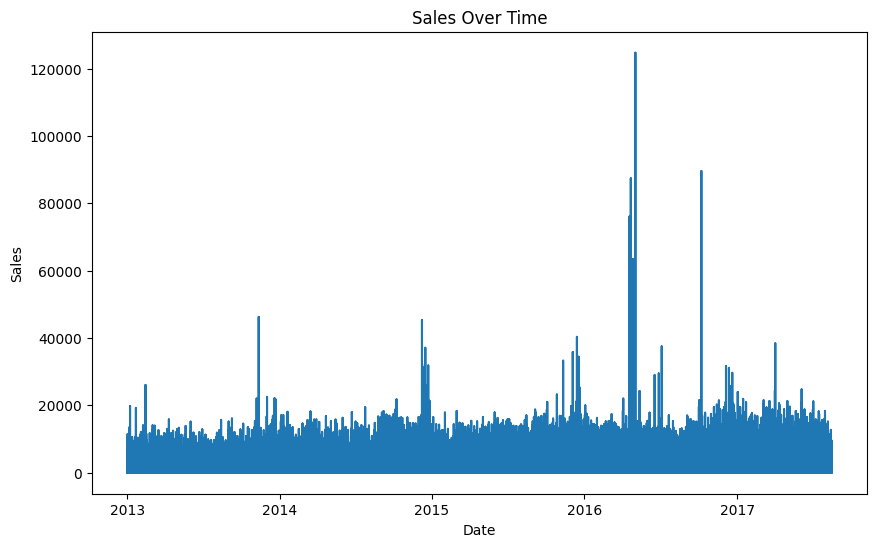

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['sales'])  # Replace 'sales' with the column you want to visualize
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

###   Plots with Seaborn

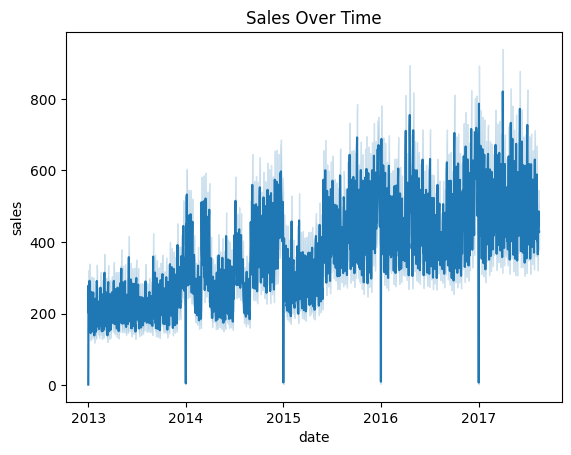

In [39]:
sns.lineplot(data=train_data, x='date', y='sales')  # Replace 'sales' with the column you want to visualize
plt.title('Sales Over Time')
plt.show()


In [40]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


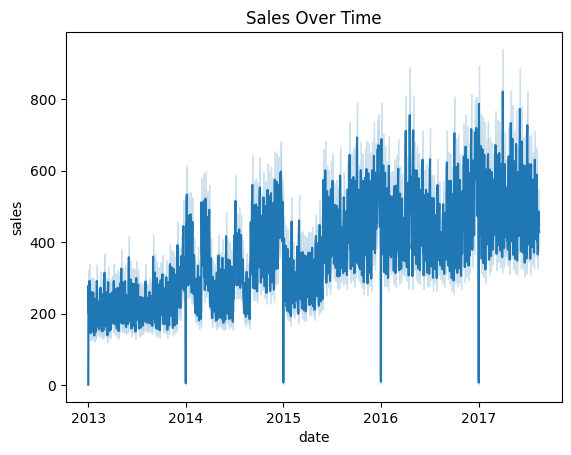

In [41]:
import seaborn as sns

sns.lineplot(data=train_data, x='date', y='sales')  # Replace 'sales' with the column you want to visualize
plt.title('Sales Over Time')
plt.show()



In [42]:
import numpy as np

# Check for infinite values
print(np.isinf(train_data).sum())

# Check for NaN values
print(train_data.isna().sum())



id                  0
date                0
sales               0
onpromotion         0
family_BABY CARE    0
                   ..
store_nbr_53        0
store_nbr_54        0
month               0
day_of_week         0
week_of_year        0
Length: 92, dtype: Int64
id                  0
date                0
sales               0
onpromotion         0
family_BABY CARE    0
                   ..
store_nbr_53        0
store_nbr_54        0
month               0
day_of_week         0
week_of_year        0
Length: 92, dtype: int64


### Bar Charts

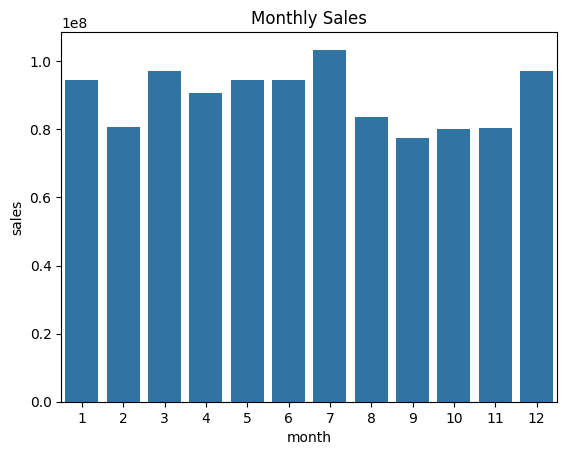

In [43]:
monthly_sales = train_data.groupby('month')['sales'].sum().reset_index()
sns.barplot(data=monthly_sales, x='month', y='sales')
plt.title('Monthly Sales')
plt.show()

### Heatmaps: 

If you want to visualize correlations or data distributed in a matrix.

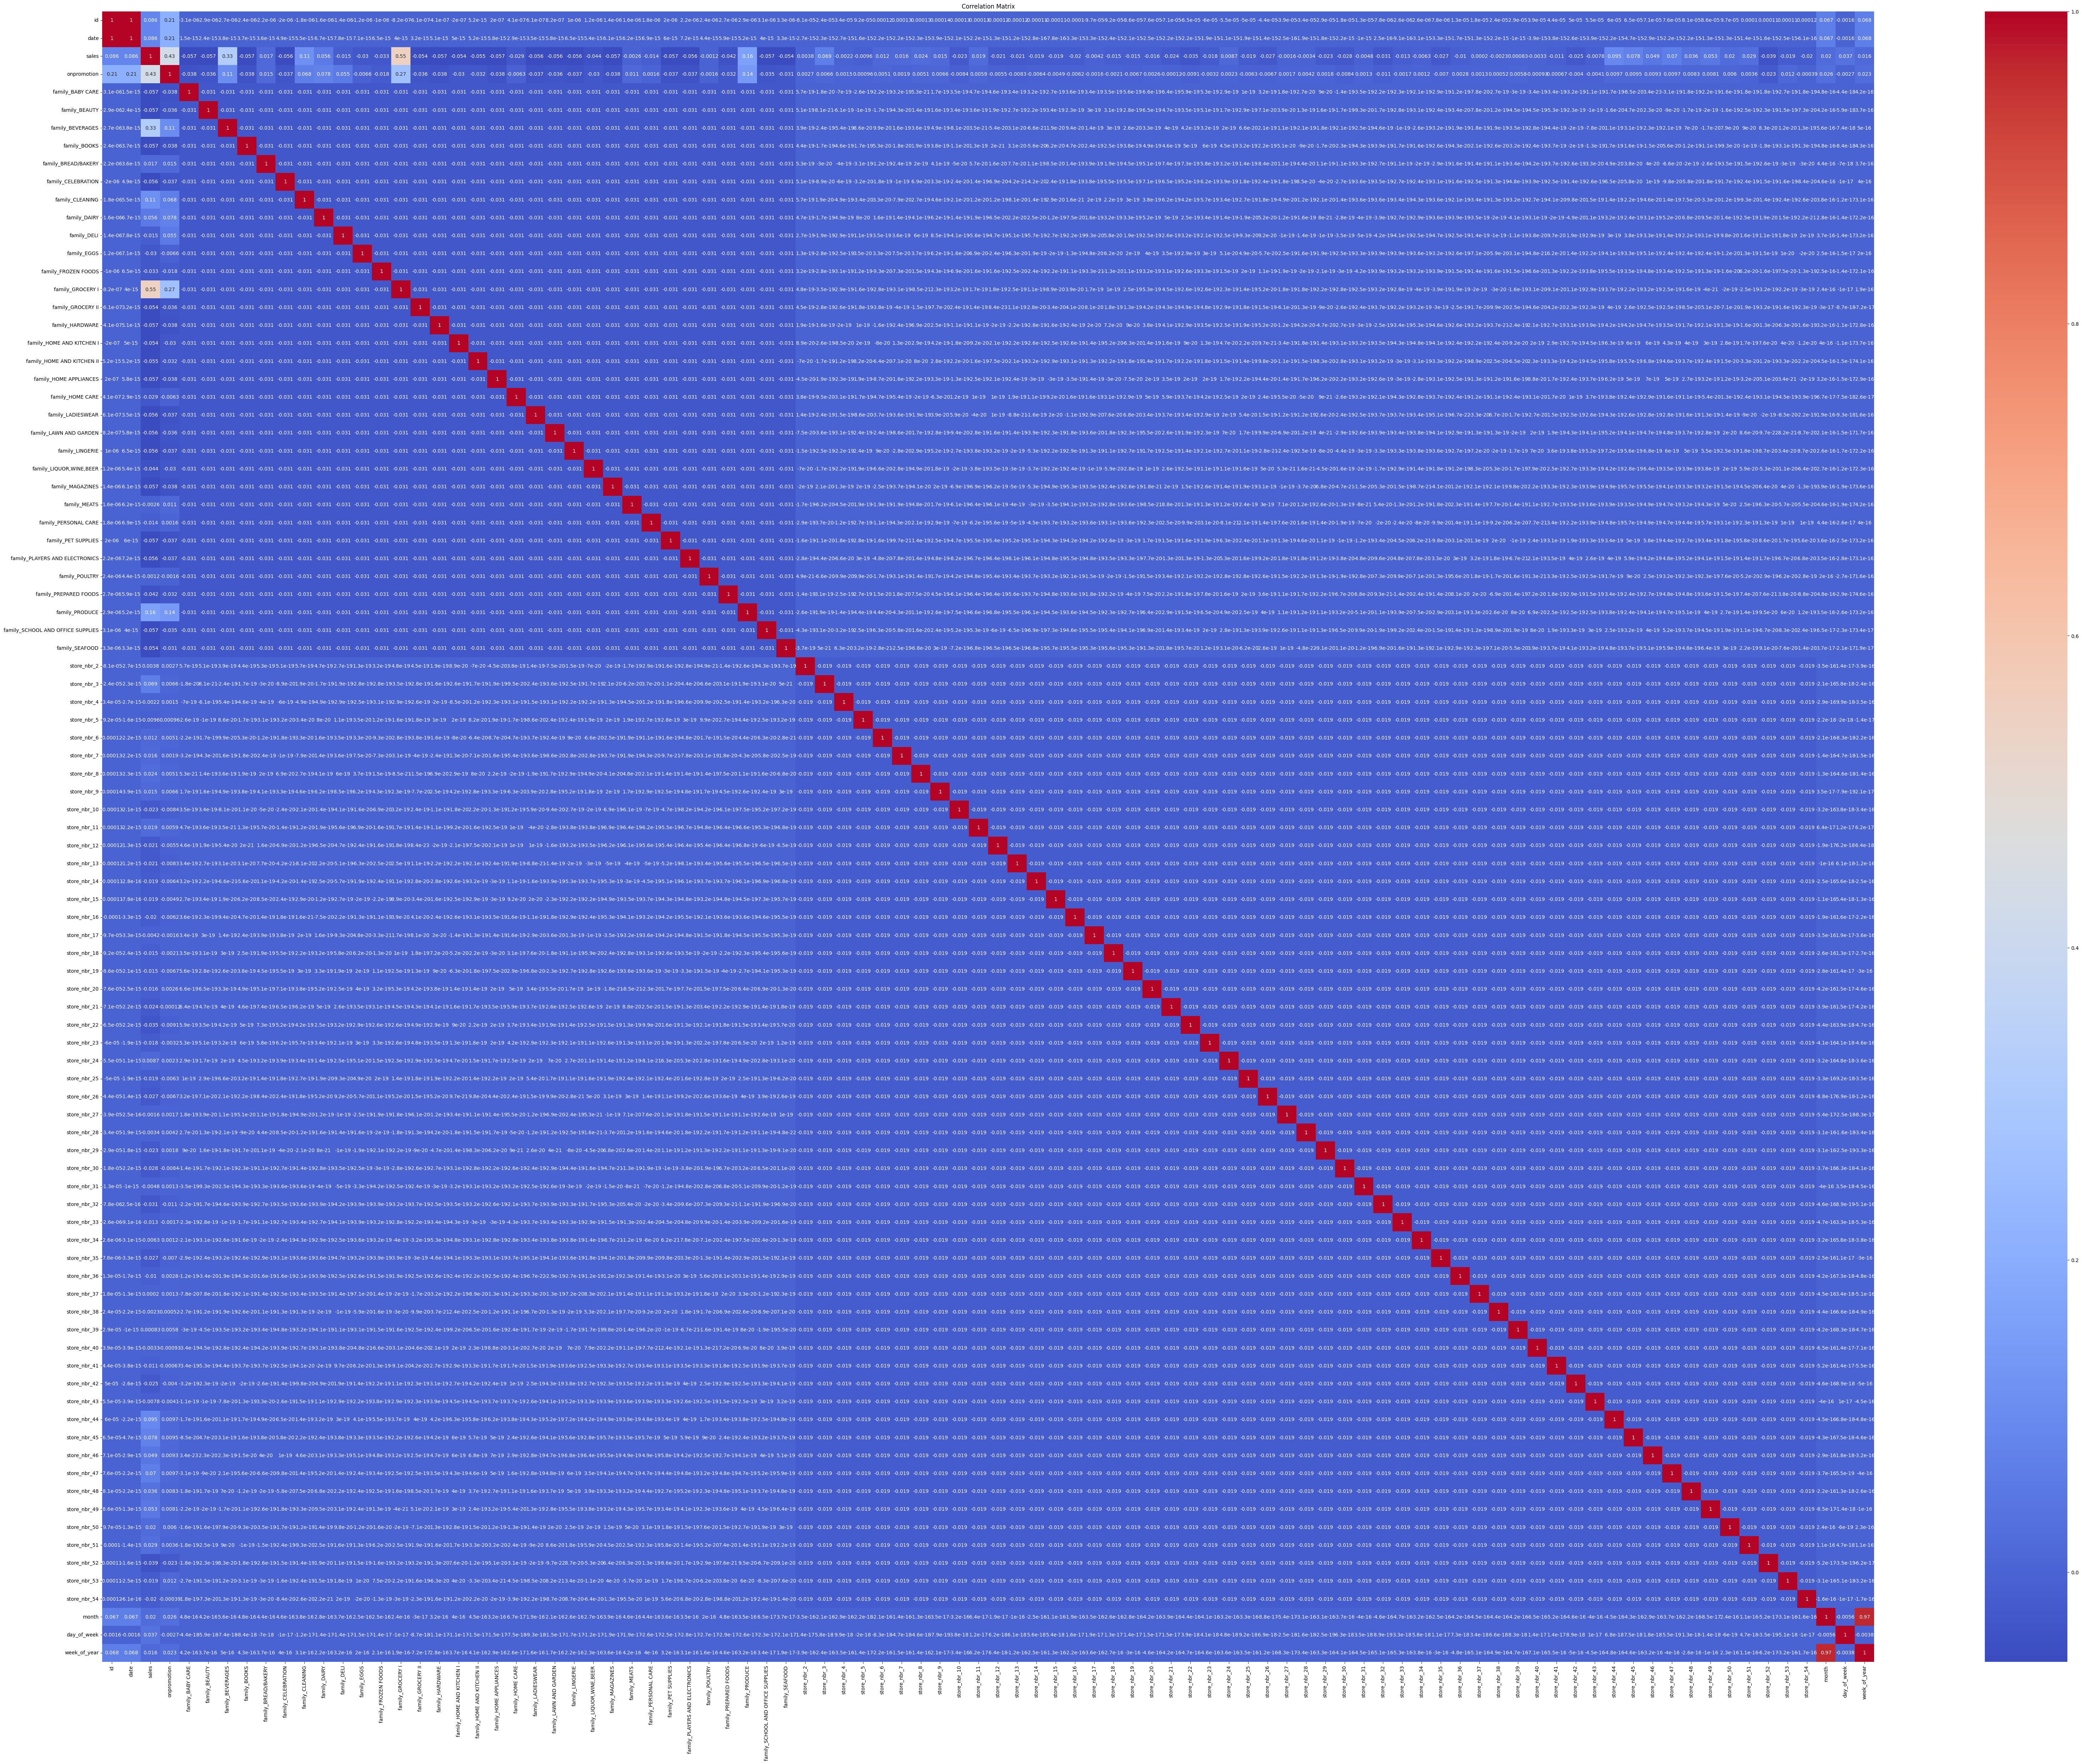

In [44]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Set up a larger figure size
plt.figure(figsize=(80, 60))  # Adjust width and height as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [45]:
# Save the heatmap as a PDF file
# plt.savefig('correlation_matrix.pdf', bbox_inches='tight')  # Save as a PDF

## 3. Exploratory Data Analysis (EDA)

Objectives: Understand trends, seasonality, and correlations in the data.

Steps:

### Sales distribution: Analyze the distribution of sales globally and by store:

In [46]:
# pip install --upgrade seaborn pandas


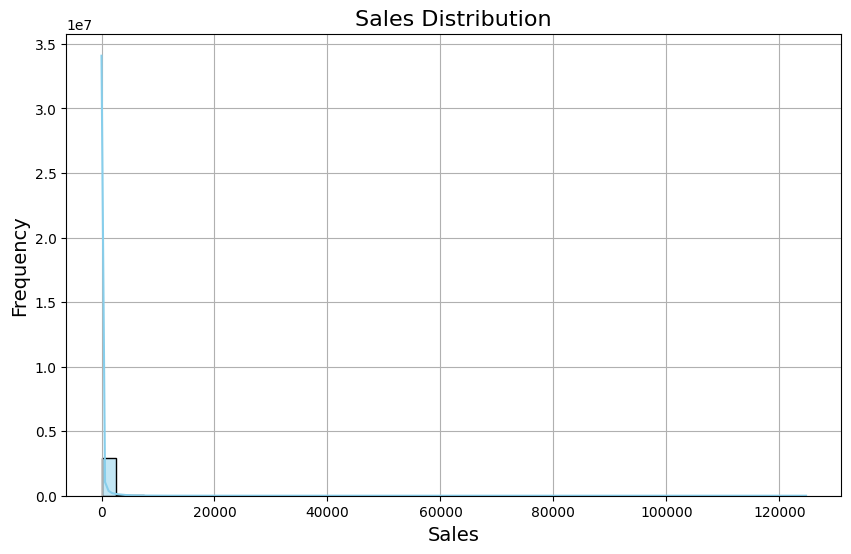

In [47]:

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Improved histogram plot bwith labels, title, and style
sns.histplot(train_data['sales'], bins=50, kde=True, color='skyblue')

# Add labels and title
plt.title('Sales Distribution', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


sns.histplot(): Plots a histogram to show the frequency distribution of sales.

bins=50: Specifies the number of bars in the histogram, providing more granularity.

kde=True: Adds a smoothed line to estimate the probability density function, which gives a visual sense of the distribution's shape.

Key Insights:

Check for skewness: If sales are heavily skewed, transformations like log scaling might be necessary.

Identify if most sales cluster around a certain range or if there are multiple modes (peaks).

Look for outliers that may need special attention (e.g., unusually high or low sales).

### Trends Over Time

Why this is important:

Analyzing sales over time helps you identify:

Seasonality (e.g., whether sales peak at certain times of the year).

Trends (e.g., increasing or decreasing sales over time).

Anomalies (e.g., sudden spikes or drops that may indicate events like promotions or holidays).

What to do:

Visualize how total sales evolve over time using a time series plot. Aggregating sales by day, week, or month will help detect long-term patterns.

How to do it:


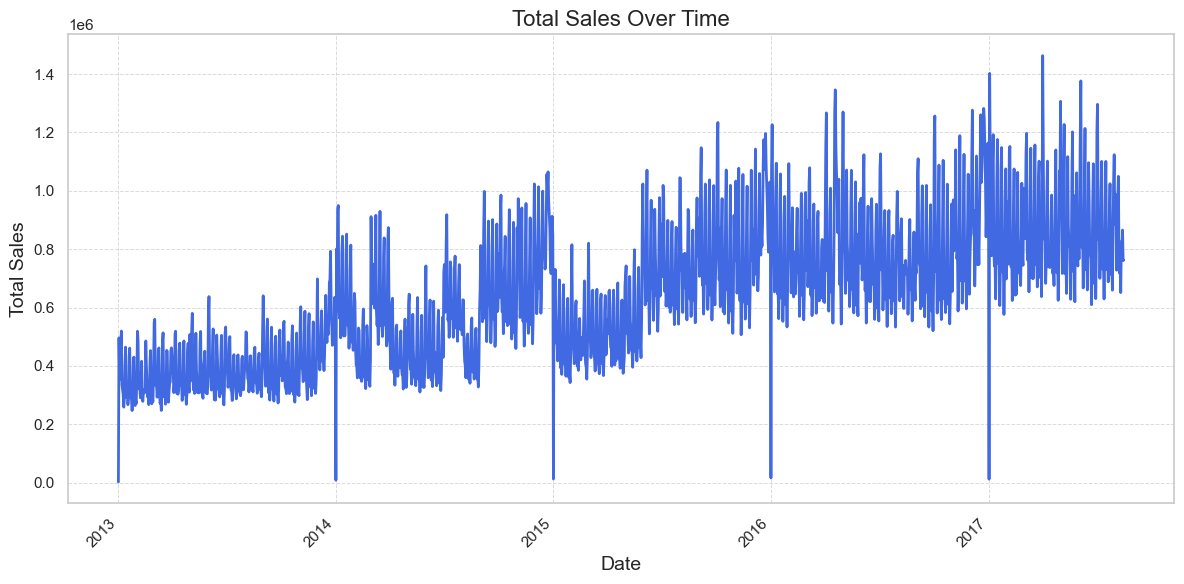

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Group by date and plot total sales over time
train_data.groupby('date')['sales'].sum().plot(color='royalblue', linewidth=2)

# Add title and labels with better font sizes
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotate x-axis labels for better readability and format as dates
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add gridlines for y-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.show()


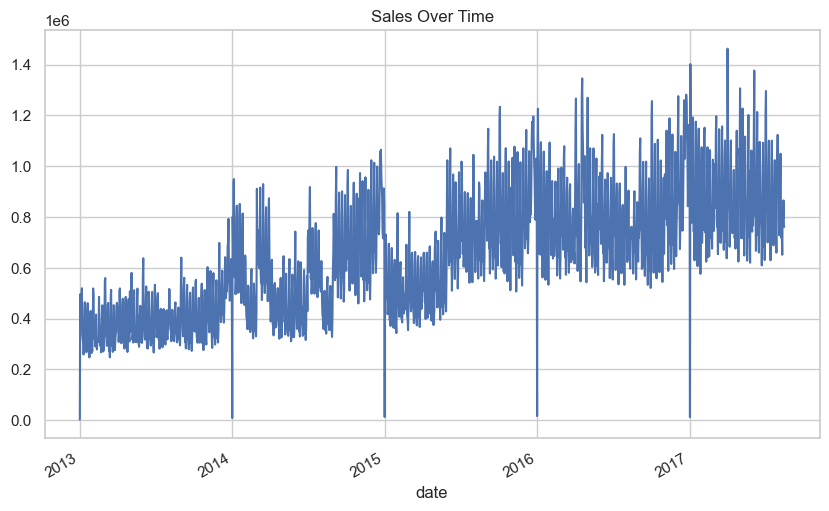

In [49]:
plt.figure(figsize=(10,6))
train_data.groupby('date')['sales'].sum().plot()
plt.title('Sales Over Time')
plt.show()


### Impact of Promotions on Sales

Why this is important:

Promotions often have a significant impact on sales.

Understanding the relationship between promotions and sales helps you determine how much weight you should give to promotional features in the model. 

This can lead to better feature engineering or the design of targeted promotional campaigns.

What to do:

You will use a boxplot to compare sales distributions for items that were on promotion vs. those that were not.


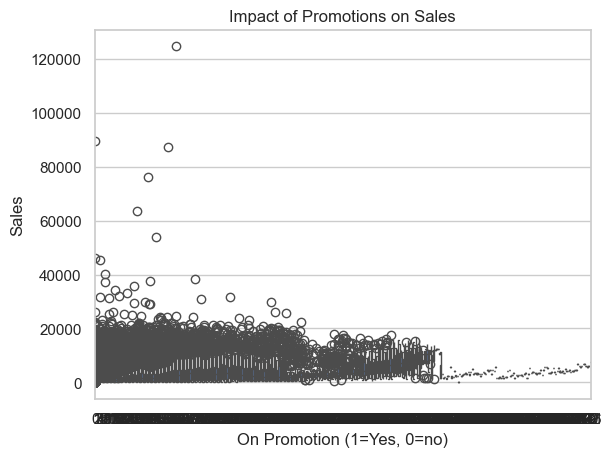

In [50]:
# Create a boxplot to compare sales with and without promotions
sns.boxplot(data=train_data, x='onpromotion', y='sales')

# Add title and labels
plt.title('Impact of Promotions on Sales')
plt.xlabel('On Promotion (1=Yes, 0=no)')
plt.ylabel('Sales')
plt.show()

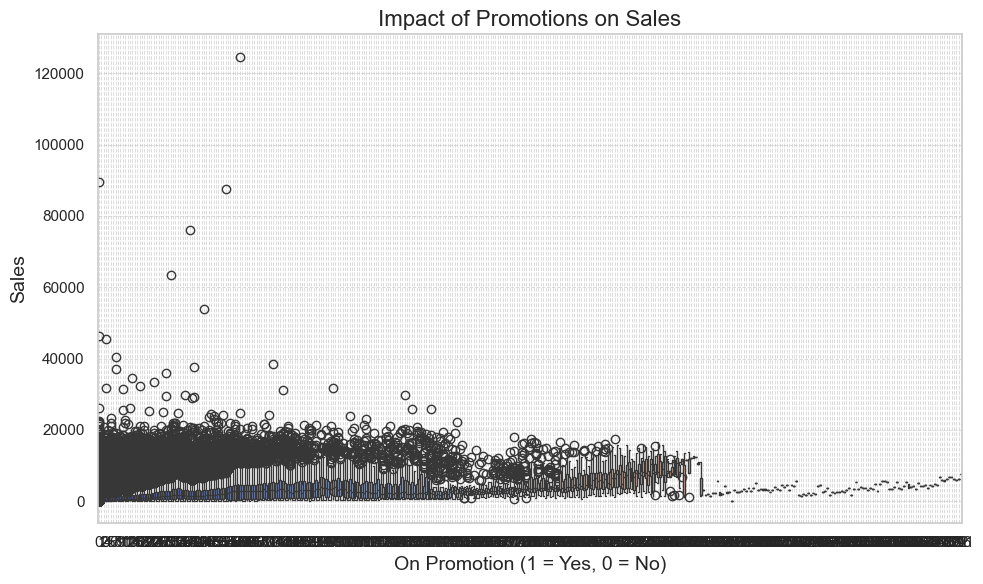

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a larger figure size and Seaborn style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a boxplot with a more appealing color palette
sns.boxplot(data=train_data, x='onpromotion', y='sales', palette='coolwarm')

# Add title and labels with better font sizes
plt.title('Impact of Promotions on Sales', fontsize=16)
plt.xlabel('On Promotion (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Add gridlines for y-axis for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


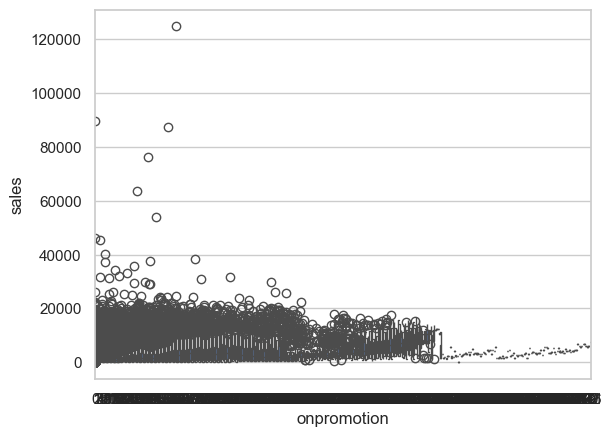

In [52]:
sns.boxplot(data=train_data, x='onpromotion', y='sales')
plt.show()


### Additional Steps to Enhance EDA:

Correlations Between Features:

You can use a heatmap to explore correlations between different numerical features (e.g., sales, onpromotion, store number).

This can help identify whether certain stores or product categories have stronger responses to promotions.

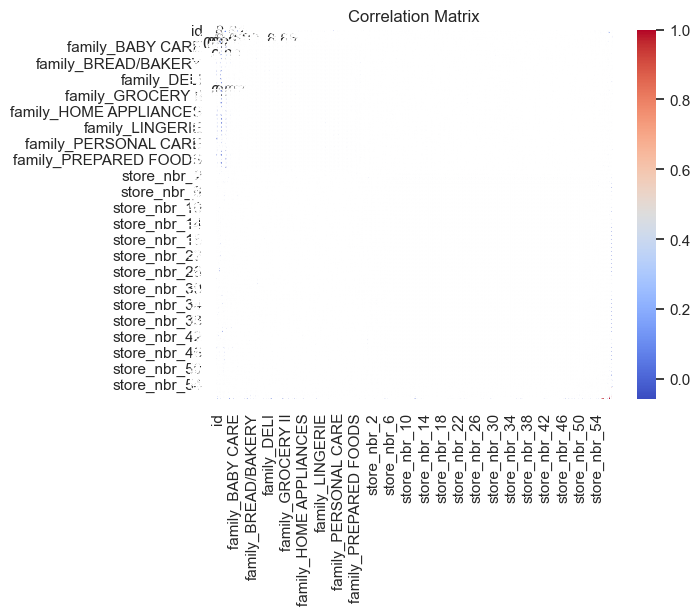

In [53]:
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [54]:
print(train_data.dtypes)

id                           int64
date                datetime64[ns]
sales                      float64
onpromotion                  int64
family_BABY CARE              bool
                         ...      
store_nbr_53                  bool
store_nbr_54                  bool
month                        int32
day_of_week                  int32
week_of_year                UInt32
Length: 92, dtype: object


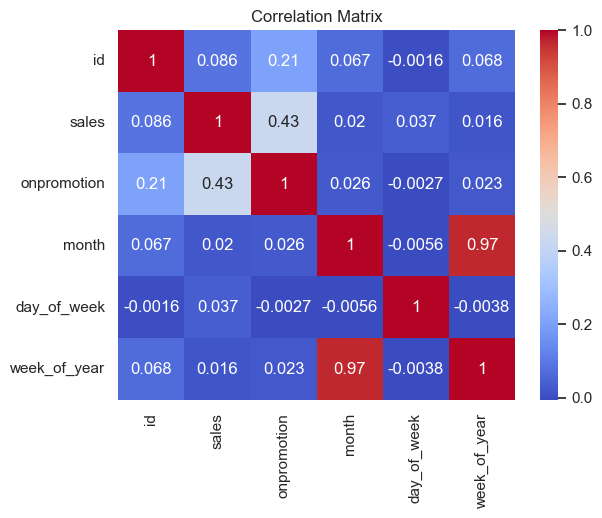

In [55]:
numeric_data = train_data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Handle Non-Numeric Data: 

If there are categorical features (e.g., store_nbr, family, etc.) that you want to include in the analysis, consider encoding them before computing the correlation matrix. 

For example, you could use one-hot encoding:

In [56]:
# train_data_encoded = pd.get_dummies(train_data, columns=['store_nbr', 'family...'], drop_first=True)
# numeric_encoded_data = train_data_encoded.select_dtypes(include=[np.number])
# corr = numeric_encoded_data.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix with Encoded Features')
# plt.show()


## 4. Data Preparation for the Model

### Sort data by date:

In [57]:
train_data = train_data.sort_values(by=['date'])

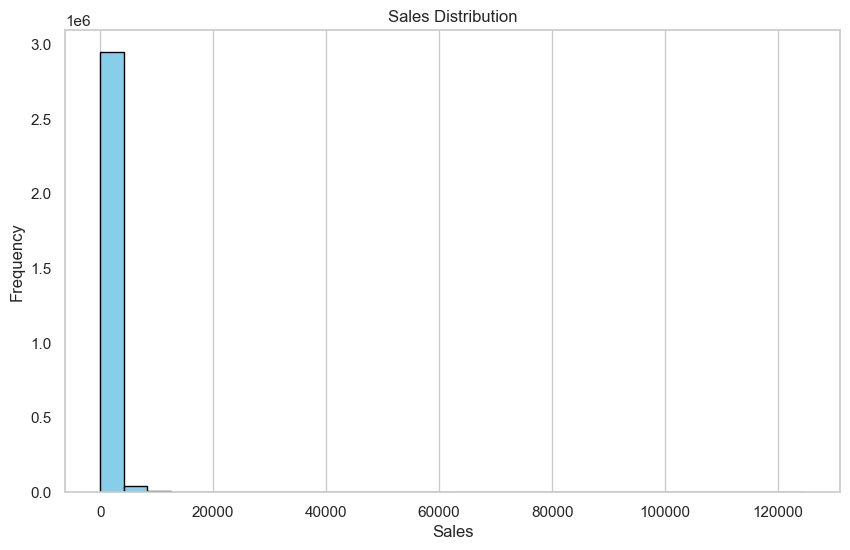

In [58]:
# Histogram. A histogram is useful for understanding the distribution of numerical data.

# Example: Visualizing a column named 'sales'
plt.figure(figsize=(10, 6))
plt.hist(train_data['sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


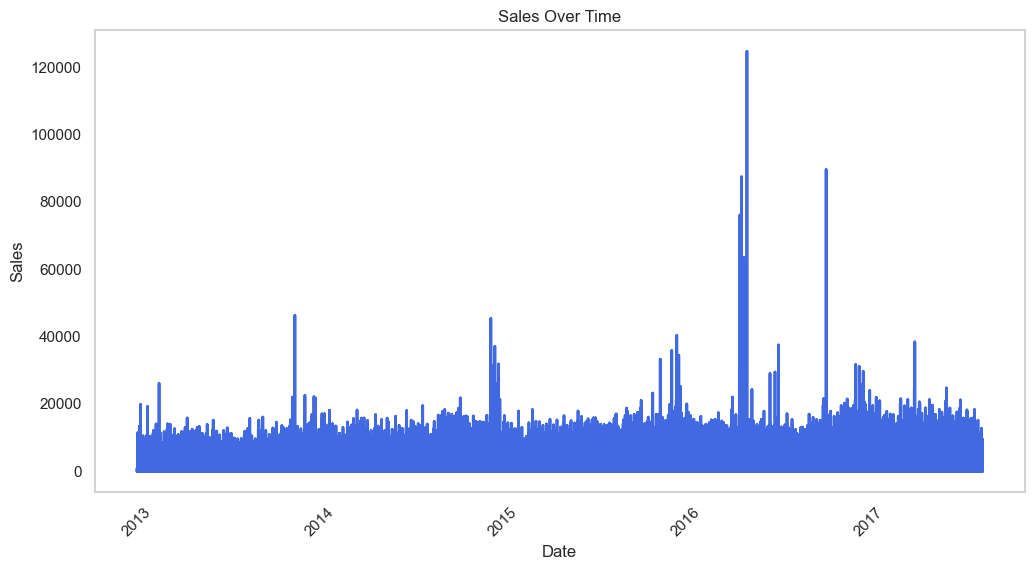

In [59]:
# Line Plot. A line plot can show trends over time, especially if the column is indexed by date.

plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['sales'], color='royalblue', linewidth=2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


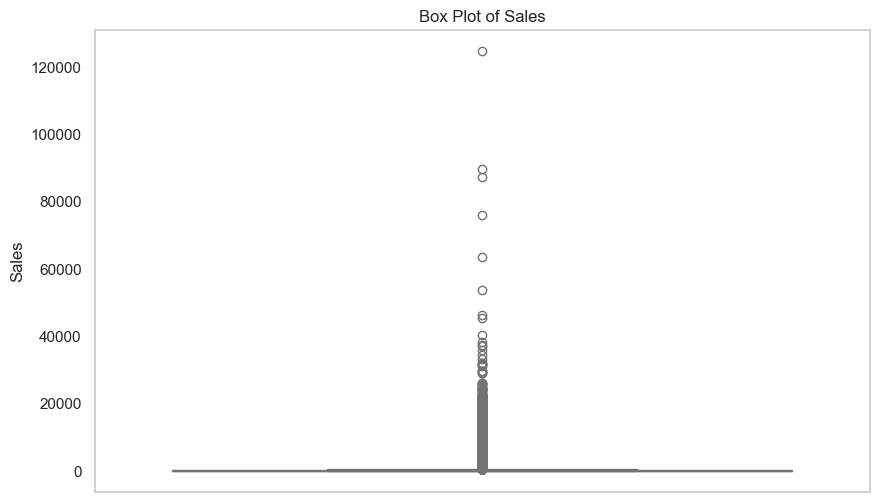

In [60]:
# Box Plot. A box plot is helpful for visualizing the distribution and identifying outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(y=train_data['sales'], color='lightgreen')
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()


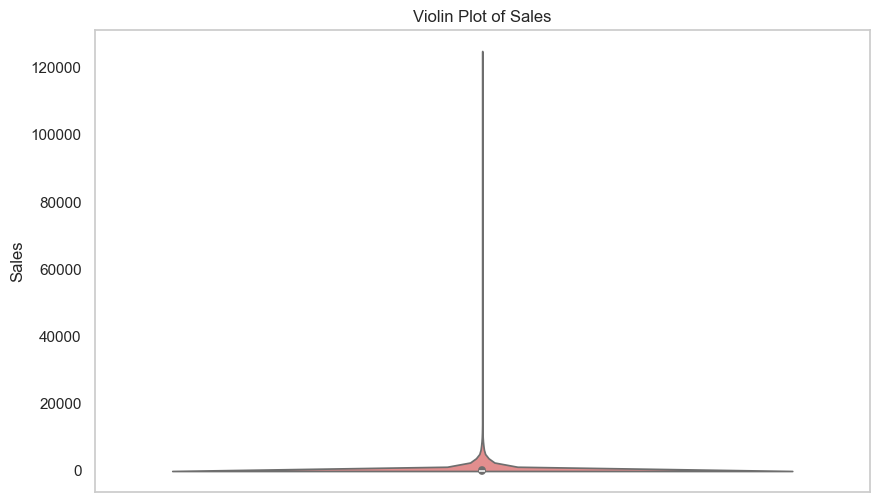

In [61]:
# Violin Plot. A violin plot combines a box plot with a density plot to show the distribution of the data

plt.figure(figsize=(10, 6))
sns.violinplot(y=train_data['sales'], color='lightcoral')
plt.title('Violin Plot of Sales')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()


### Split the dataset

In [62]:
# Ensure 'date' is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# Sort the data by date (if not already sorted)
train_data = train_data.sort_values('date')

# Determine the total number of rows
total_rows = len(train_data)

# Calculate the number of rows for the training set (80%)
train_size = int(total_rows * 0.8)

In [63]:
total_rows, train_size, train_data

(3000888,
 2400710,
               id       date    sales  onpromotion  family_BABY CARE  \
 0              0 2013-01-01    0.000            0             False   
 890          890 2013-01-01    0.000            0             False   
 2              2 2013-01-01    0.000            0             False   
 3              3 2013-01-01    0.000            0             False   
 4              4 2013-01-01    0.000            0             False   
 ...          ...        ...      ...          ...               ...   
 3000882  3000882 2017-08-15    6.000            0             False   
 3000883  3000883 2017-08-15  438.133            0             False   
 3000884  3000884 2017-08-15  154.553            1             False   
 3000874  3000874 2017-08-15   10.000            0             False   
 3000887  3000887 2017-08-15   16.000            0             False   
 
          family_BEAUTY  family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  \
 0                False           

In [64]:
# Get the split date
split_date = train_data['date'].iloc[train_size]

# Now you can use this split date to create your train and test sets
train_set = train_data[train_data['date'] < split_date]
test_set = train_data[train_data['date'] >= split_date]

print(f'Split Date: {split_date}')


Split Date: 2016-09-12 00:00:00


In [65]:
#train_set = train_data[train_data['date'] < '2017-01-01']
#test_set = train_data[train_data['date'] >= '2017-01-01']

## 5. Development of the Time Series Model

This section outlines different modeling approaches for forecasting sales based on historical data.

### Traditional Time Series Models

#### ARIMA

ARIMA (AutoRegressive Integrated Moving Average)
Overview: Suitable for datasets with trends and seasonality.

Steps:
- Identify parameters p,d and q using ACF and PACF plots 
- Fit the model

##### Identify Parameters p,d and q Using ACF and PACF Plots

Definitions:

p: The number of lag observations included in the model (AR term).

d: The degree of differencing (to make the series stationary).

q: The size of the moving average window (MA term).

Steps to Identify Parameters:
Check for Stationarity:
Before identifying p, d, and q, it’s essential to ensure the time series is stationary. Use the Augmented Dickey-Fuller (ADF) test to check for stationarity

Differencing:
If the series is not stationary (p-value > 0.05), apply differencing to remove trends and seasonality. This gives you d. In this case, i didn't need to do it, because p-value = 0.

##### Check for STATIONARITY:

Differencing

Plot ACF and PACF:

Interpretation:

ACF Plot:
Look for where the ACF plot crosses the significance level (usually the dashed lines) and where it cuts off. This indicates the value of q.

PACF Plot:
Similarly, observe the PACF plot to find where it cuts off to determine p.


In [66]:
# Run all'infinito!

#result = adfuller(train_data['sales'])
#print('ADF statistic:', result[0])
#print('p-value:', result[1])

In [67]:
# Check for missing values
print(train_data['sales'].isnull().sum())

# Check the type of 'sales' column
print(train_data['sales'].dtype)

0
float64


In [68]:
# Trasformato la colonna sales in numeri 
train_data['sales'] = pd.to_numeric(train_data['sales'], errors='coerce')

Explanation:
Handling Missing/Non-Numeric Data: The adfuller function requires a complete numeric series. Missing or non-numeric values will lead to issues, potentially causing the test to run indefinitely.

Reducing Dataset Size: If the dataset is large, reducing the size helps test if the function works on a smaller set and gives you feedback on where the issue lies.

In [69]:
# Nonostante ciò non funziona, quindi nella casella successiva riduco le dimensioni del data set così da rendere il calcolo più veloce.

# Running ADF Test on the cleaned 'sales' column
#result = adfuller(train_data['sales'])
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])

In [70]:
sample_data = train_data.sample(frac=0.1, random_state=42)  # Using 10% of the data
result = adfuller(sample_data['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -549.5423676107573
p-value: 0.0


Interpretation:
Stationarity: A p-value of 0.0 means the null hypothesis of the ADF test (which assumes that the series is non-stationary) can be rejected with very high confidence. In other words, the sales series is already stationary.

Next Step: Since your data is stationary, there is no need to apply differencing (d = 0). Differencing is only necessary when the series is non-stationary, indicated by a p-value > 0.05.

##### Plot ACF and PACF

Now, you can proceed with identifying the other parameters for your ARIMA model—p (autocorrelation lag) and q (moving average)—using ACF and PACF plots, since the d parameter is set to 0.


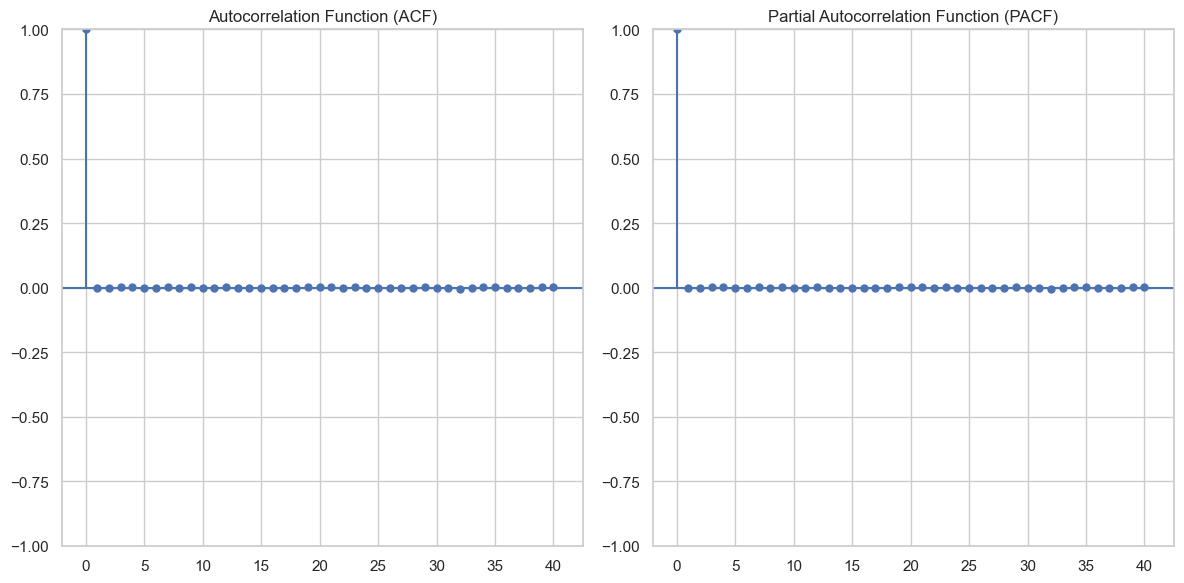

In [71]:
plt.figure(figsize=(12, 6))

# ACF (for q parameter)
plt.subplot(121)
plot_acf(sample_data['sales'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF (for p parameter)
plt.subplot(122)
plot_pacf(sample_data['sales'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Interpretation:

ACF Plot: Since there is no significant autocorrelation at any lag greater than 0, it indicates that the MA (Moving Average) component, denoted as q, should be 0.

PACF Plot: Similarly, the PACF also shows no significant partial autocorrelation beyond lag 0, suggesting that the AR (AutoRegressive) component, denoted as p, should also be 0.

What does this mean?

Both the ACF and PACF plots indicate that there’s no strong autocorrelation in the data, and the model you are working with is likely not benefiting from AR or MA terms. 

Essentially, this points towards a simple ARIMA(0, d, 0) model, where d is the order of differencing that has been applied or needs to be applied.

##### Fit the model

In [72]:
# Errore: quindi uso il database semplificato

# Define the ARIMA model
#model = ARIMA(train_data['sales'], order=(0, 2, 0))  # Here, p and q are determined from the plots
#model_fit = model.fit()

# Summary of the model
#print(model_fit.summary())

In [73]:
# Ho messo il risultato direttamente sotto così da non dover di nuovo run la cella e rendere il modello più leggero

#sample_data = train_data.sample(frac=0.5, random_state=42) # Used 50% of the data
#model = ARIMA(sample_data['sales'], order=(0,1,0))
#model_fit = model.fit()
#print(model_fit.summary())

In [74]:
# SARIMAX Results                                
#==============================================================================
#Dep. Variable:                  sales   No. Observations:              1500444
#Model:                 ARIMA(0, 1, 0)   Log Likelihood           -13164196.160
#Date:                Sun, 22 Sep 2024   AIC                       26328394.320
#Time:                        17:39:54   BIC                       26328406.541
#Sample:                             0   HQIC                      26328397.629
#                            - 1500444                                         
#Covariance Type:                  opg                                         
#==============================================================================
#                 coef    std err          z      P>|z|      [0.025      0.975]
#------------------------------------------------------------------------------
#sigma2      2.444e+06    393.180   6216.328      0.000    2.44e+06    2.44e+06
#===================================================================================
#Ljung-Box (L1) (Q):              374932.40   Jarque-Bera (JB):         637962287.22
#Prob(Q):                              0.00   Prob(JB):                         0.00
#Heteroskedasticity (H):               1.02   Skew:                             0.01
#Prob(H) (two-sided):                  0.00   Kurtosis:                       104.02
#===================================================================================

#Warnings:
#[1] Covariance matrix calculated using the outer product of gradients (complex-step).

##### Evaluate the model using AIC/BIC for selection of optimal parameters

Comprendere il Risultato Attuale:

AIC: Akaike Information Criterion è una metrica per misurare la qualità del modello, tenendo conto della complessità del modello. 

L'obiettivo è minimizzare l'AIC: un valore più basso indica un modello migliore.

BIC: Bayesian Information Criterion è simile all'AIC, ma penalizza maggiormente la complessità del modello. Anche qui, l'obiettivo è minimizzare il valore.

Dal tuo modello attuale:

AIC: 26,328,394
BIC: 26,328,406

Poiché hai usato un modello ARIMA(0,1,0), ora testeremo altri modelli con parametri diversi per confrontare i valori di AIC/BIC e scegliere il modello migliore.

Passaggi per la selezione ottimale dei parametri:
1. Testare diversi valori di p, d, e q:
Ora proveremo diversi modelli ARIMA con combinazioni diverse di parametri p, d, q e confronteremo i valori di AIC e BIC. Puoi eseguire un loop su più combinazioni di valori per vedere quale modello ottiene i valori di AIC/BIC più bassi.
2. Implementare un loop per la ricerca dei migliori parametri

In [75]:
# Definire i parametri massimi che si vogliono testare per p, d e q
p_values = range(0, 3)  # Testiamo p da 0 a 2
d_values = range(0, 2)  # Testiamo d da 0 a 1
q_values = range(0, 3)  # Testiamo q da 0 a 2

# Definiamo una lista per memorizzare i risultati
results = []

# Loop per testare tutte le combinazioni di p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Definire e adattare il modello ARIMA
                model = ARIMA(sample_data['sales'], order=(p, d, q))
                model_fit = model.fit()
                
                # Salvare i valori di AIC, BIC e i parametri
                aic = model_fit.aic
                bic = model_fit.bic
                results.append((p, d, q, aic, bic))
                print(f'ARIMA({p},{d},{q}) - AIC:{aic}, BIC:{bic}')
                
            except Exception as e:
                print(f'Errore con ARIMA({p},{d},{q}): {e}')

# Creare un DataFrame con i risultati
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC', 'BIC'])

# Ordinare i risultati per AIC (o BIC)
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

print(f"\nMiglior modello basato su AIC: ARIMA({best_aic['p']},{best_aic['d']},{best_aic['q']}) - AIC: {best_aic['AIC']}")
print(f"Miglior modello basato su BIC: ARIMA({best_bic['p']},{best_bic['d']},{best_bic['q']}) - BIC: {best_bic['BIC']}")

ARIMA(0,0,0) - AIC:8535080.534621796, BIC:8535101.758290548
ARIMA(0,0,1) - AIC:5050494.742491093, BIC:5050526.577994223
ARIMA(0,0,2) - AIC:5050496.532800657, BIC:5050538.980138162
ARIMA(0,1,0) - AIC:5259433.345087236, BIC:5259443.95691828
ARIMA(0,1,1) - AIC:5050507.2048106, BIC:5050528.4284726875
ARIMA(0,1,2) - AIC:5050495.094746818, BIC:5050526.930239949
ARIMA(1,0,0) - AIC:5050494.747579973, BIC:5050526.5830831025
ARIMA(1,0,1) - AIC:5050496.615665909, BIC:5050539.063003414
ARIMA(1,0,2) - AIC:5050498.621960589, BIC:5050551.68113247
ARIMA(1,1,0) - AIC:5172639.533805069, BIC:5172660.757467156
ARIMA(1,1,1) - AIC:5050491.491777506, BIC:5050523.327270637
ARIMA(1,1,2) - AIC:5050494.7065231735, BIC:5050537.153847349
ARIMA(2,0,0) - AIC:5050496.529911026, BIC:5050538.977248532
ARIMA(2,0,1) - AIC:5050498.70637514, BIC:5050551.765547021
ARIMA(2,0,2) - AIC:5050499.55698161, BIC:5050563.227987868
ARIMA(2,1,0) - AIC:5136948.188383012, BIC:5136980.023876144
ARIMA(2,1,1) - AIC:5050492.50583767, BIC:50

Miglior modello basato su AIC: ARIMA(1.0,1.0,1.0) - AIC: 25288397.7998873
Miglior modello basato su BIC: ARIMA(1.0,1.0,1.0) - BIC: 25288434.463700168

Spiegazione:

Parametri p, d, q:

p: Rappresenta l'ordine autoregressivo (AR). È il numero di termini AR inclusi nel modello, determinato osservando il PACF.

d: Differenziazione per rendere stazionaria la serie, come hai già fatto (qui abbiamo deciso d=1).

q: L'ordine della media mobile (MA), determinato dall'osservazione dell'ACF.

Loop su parametri: Questo script esegue un loop su tutti i valori di p, d, e q per trovare la combinazione di parametri che minimizza AIC e 
BIC.

Confronto dei modelli:

Dopo aver testato diverse combinazioni, ordiniamo i risultati per AIC e BIC e troviamo il modello con il valore minimo di entrambi.
Best model: Alla fine del processo, il codice stampa il miglior modello basato su AIC e BIC.


##### Fit the model in the all dataset with best AIC ann BIC

In [78]:
# Usa un dataset ridotto per il fitting iniziale dei modelli
sample_data = train_data.sample(frac=0.1, random_state=42) # Prendi il 10% dei dati per accelerare il fitting

# Esegui il fitting finale sul dataset completo usando i parametri migliori
best_model = ARIMA(train_data['sales'], order=(best_aic['p'], best_aic['d'], best_aic['q']),
                   enforce_stationarity=False, enforce_invertibility=False)

# Fitting finale con l'intero dataset
best_model_fit = best_model.fit()

# Stampa del sommario del miglior modello
print(best_model_fit.summary())

In [ ]:
# Refit the best model based on AIC (or BIC if preferred) using the entire dataset
#best_model = ARIMA(train_data['sales'], order=(best_aic['p'], best_aic['d'], best_aic['q']))  # Use best_aic['p'], best_bic['p'] for BIC
#best_model_fit = best_model.fit()

# Print the summary of the best model
#print(best_model_fit.summary())

In [ ]:
# --------- Diagnostica sui residui ---------
# Residui del miglior modello
residuals = best_model_fit.resid

# Plot per verificare che i residui si comportino come rumore bianco
plt.figure(figsize=(12, 6))

# Grafico dei residui
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')

# Istogramma dei residui
plt.subplot(122)
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# ACF e PACF dei residui per verificare eventuali autocorrelazioni
plt.figure(figsize=(12, 6))

# ACF dei residui
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# PACF dei residui
plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Residual diagnostics
residuals = best_model_fit.resid

# Plot residuals to check for any patterns (residuals should behave like white noise)
#plt.figure(figsize=(12, 6))
#plt.subplot(121)
#plt.plot(residuals)
#plt.title('Residuals')

#plt.subplot(122)
#plt.hist(residuals, bins=50)
#plt.title('Histogram of Residuals')

#plt.tight_layout()
#plt.show()

# ACF and PACF of residuals to check for any autocorrelation
#plt.figure(figsize=(12, 6))
#plt.subplot(121)
#plot_acf(residuals, lags=40, ax=plt.gca())
#plt.title('ACF of Residuals')

#plt.subplot(122)
#plot_pacf(residuals, lags=40, ax=plt.gca())
#àplt.title('PACF of Residuals')

#plt.tight_layout()
#plt.show()

#### Prophet (by Facebook)

Overview: Designed to handle missing data and seasonality well.

oad your data, prepare it for Prophet, fit the model, and make predictions. This will follow the structure of how you used the ARIMA model but using Prophet instead, with detailed steps and code.

Step-by-Step Adaptation for Prophet

Prepare Data for Prophet: Prophet requires a specific format where the date column is labeled as ds and the value column (sales) is labeled as y. We will extract these from your existing dataset and rename them.

Fit the Prophet Model: Prophet handles seasonality and missing data well, so we can directly fit it to the dataset after preparing the data.

Make Future Predictions: We will create a future dataframe for a specified number of periods (e.g., 365 days) and forecast sales for these future periods.

Visualize Forecast: We can use Prophet’s built-in plotting methods to visualize the forecast.

### ARIMA VS Prophet

### Machine Learning Models

## 6. Model Evaluation

## 7. Model Optimization

## 8. Implementation and Reporting

## 9. Monitoring the Model in Production

## 10. Internal Sensitivity Analysis

## 11. Development of a Monitoring Dashboard

## 12. Cross-Validation

## 13. Residual Analysis

## 14. Conclusion and Future Work